In [3]:
import numpy as np
import pandas as pd
from collections import defaultdict
from kmodes.kmodes import KModes
from matplotlib import pyplot as plt
from prince import FAMD, MCA
from sklearn import datasets, decomposition
from sklearn import cluster as cl
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from collections import defaultdict
from kmodes.kmodes import KModes
from matplotlib import pyplot as plt
from prince import FAMD, MCA
from sklearn import datasets, decomposition
from sklearn import cluster as cl
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist


In [2]:
bk_behaviour_m2 = pd.read_csv('../../Data/master_data/bk_behaviour.csv')

In [115]:
# Find outliers
column_names = bk_behaviour_m2.columns[-13:]
for column_name in column_names:
    z_score = stats.zscore(bk_behaviour_m2[column_name])
    abs_z_score = np.abs(z_score)
    outliers = bk_behaviour_m2[column_name][(abs_z_score > 3)].tolist()
    if len(outliers) > 0:
        print(f"Outliers found in column: {column_name}")
        print(f"Outlier values: {outliers}")
    else:
        print(f"No outliers found in column: {column_name}")

No outliers found in column: cc_av_wd
No outliers found in column: cc_av_pm
No outliers found in column: cc_n_wd
No outliers found in column: cc_n_pm
No outliers found in column: cq_av_wd
No outliers found in column: cq_av_dp
No outliers found in column: cq_n_wd
No outliers found in column: cq_n_dp
No outliers found in column: sv_av_wd
No outliers found in column: sv_av_dp
No outliers found in column: sv_n_wd
No outliers found in column: sv_n_dp
No outliers found in column: end_start_ratio


In [116]:
# Scale variables to be between [0,1] for KMeans clustering 
# scaler = MinMaxScaler(feature_range=(0, 1))
# bk_behaviour_m2.iloc[:, -13:] = scaler.fit_transform(bk_behaviour_m2.iloc[:, -13:])

In [134]:
for col in bk_behaviour_m2.columns:
    bk_behaviour_m2[col][bk_behaviour_m2[col].isna()] = 0
    try:
        bk_behaviour_m2[col] = np.abs(bk_behaviour_m2[col])
        bk_behaviour_m2[col] = bk_behaviour_m2[col] / np.max(bk_behaviour_m2[col])
    except:
        pass

/var/folders/rk/815pd2rj3l5gyxnkn8q_m5sc0000gn/T/ipykernel_5420/3735563156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bk_behaviour_m2[col][bk_behaviour_m2[col].isna()] = 0
/var/folders/rk/815pd2rj3l5gyxnkn8q_m5sc0000gn/T/ipykernel_5420/3735563156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bk_behaviour_m2[col][bk_behaviour_m2[col].isna()] = 0
/var/folders/rk/815pd2rj3l5gyxnkn8q_m5sc0000gn/T/ipykernel_5420/3735563156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [135]:
bk_behaviour_m2

,cust_id,acct_nbr,acct_type,account_active,starting_balance,ending_balance,cc_av_wd,cc_av_pm,cc_n_wd,cc_n_pm,cq_av_wd,cq_av_dp,cq_n_wd,cq_n_dp,sv_av_wd,sv_av_dp,sv_n_wd,sv_n_dp,end_start_ratio
0,0.999495,2.987861e-09,SV,1.0,0.052829,0.012686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.187021,0.127231,0.484848,0.59375,0.006984
1,0.999424,1.000000e+00,CC,1.0,0.009838,0.022117,0.175377,0.040837,0.294118,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.065386
2,0.999517,1.000000e+00,CC,1.0,0.002065,0.044578,0.125647,0.010712,0.176471,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.627907
3,0.999865,2.988968e-09,CK,1.0,0.406951,0.043172,0.000000,0.000000,0.000000,0.000000,0.432303,0.141949,0.75641,0.617647,0.000000,0.000000,0.000000,0.00000,0.003085
4,0.999902,1.000000e+00,CC,1.0,0.031374,0.020607,0.233622,0.054137,0.235294,0.916667,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.019104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sv_av_wd,0.000000,0.000000e+00,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
sv_av_dp,0.000000,0.000000e+00,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
sv_n_wd,0.000000,0.000000e+00,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
sv_n_dp,0.000000,0.000000e+00,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


/Users/brigitte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


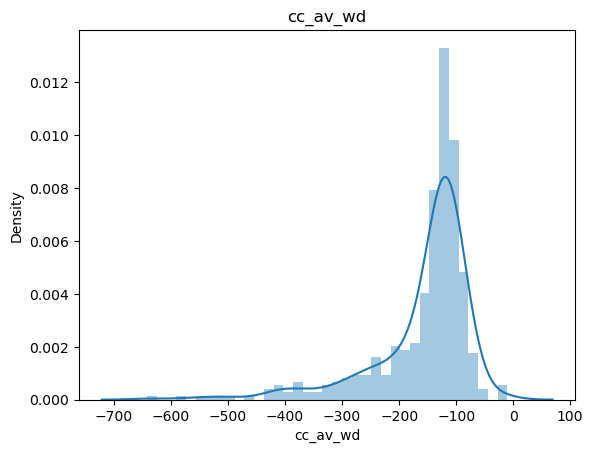

/Users/brigitte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


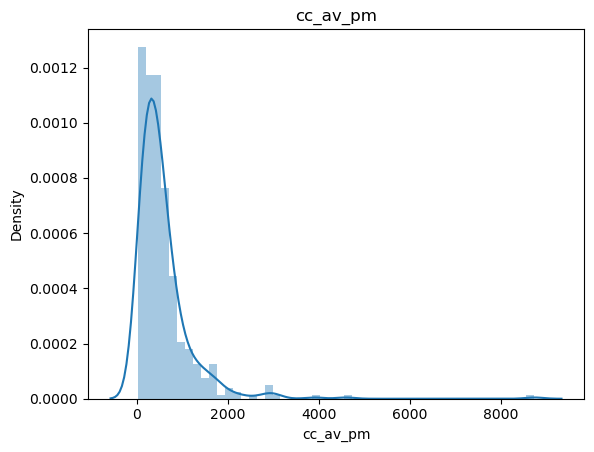

/Users/brigitte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


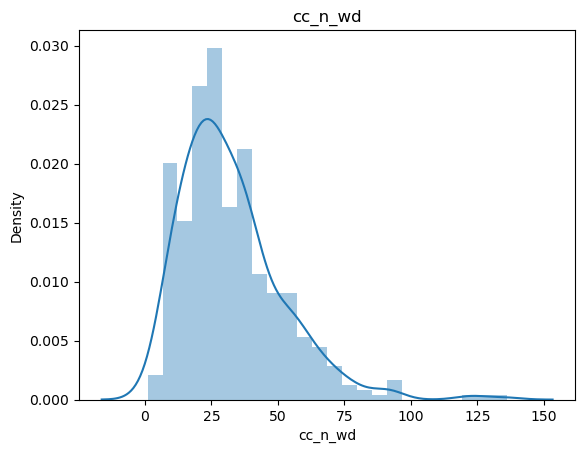

/Users/brigitte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


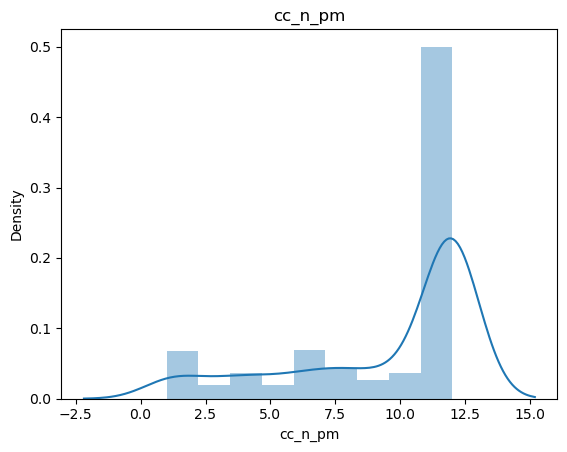

/Users/brigitte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


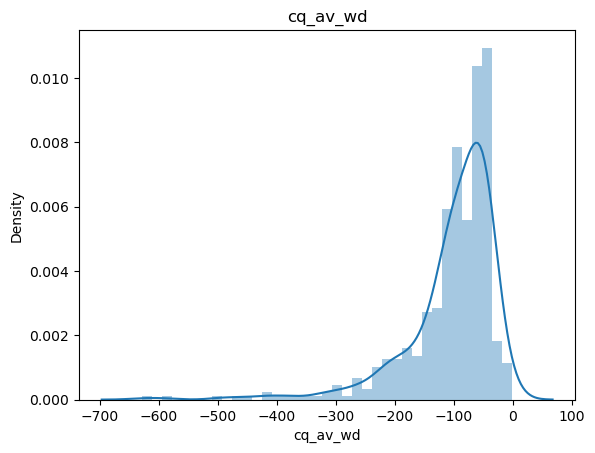

/Users/brigitte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


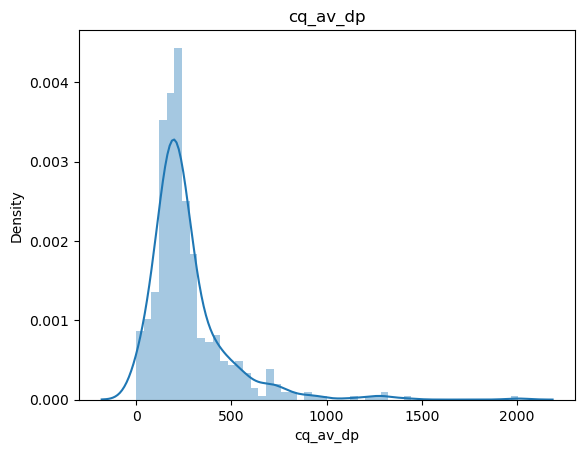

/Users/brigitte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


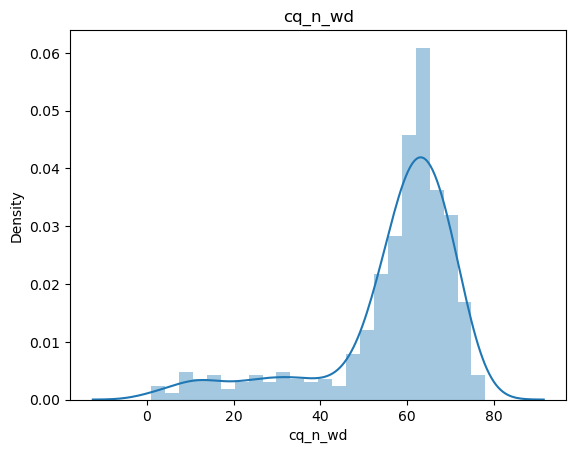

/Users/brigitte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


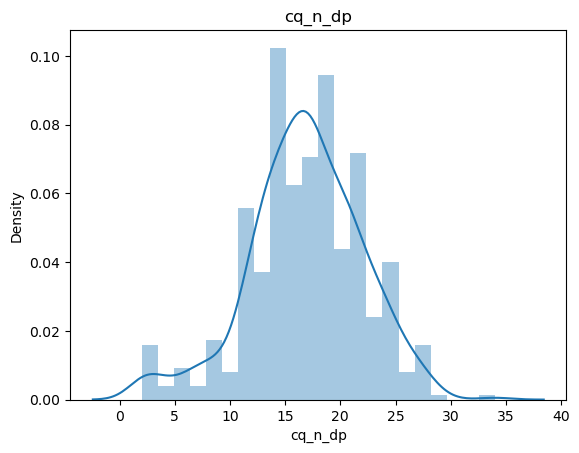

/Users/brigitte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


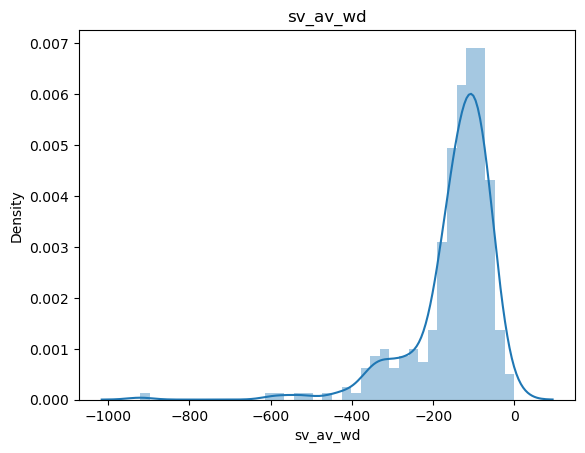

/Users/brigitte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


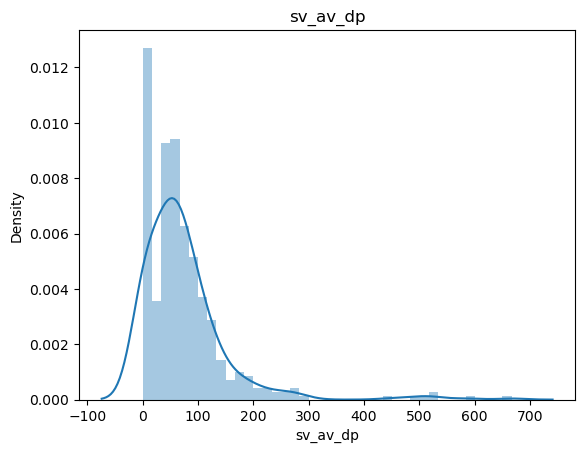

/Users/brigitte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


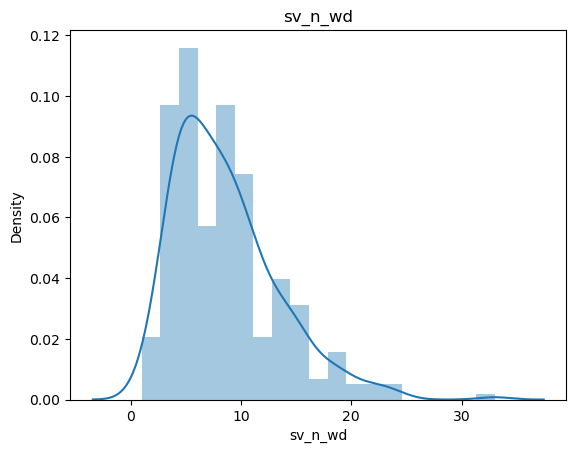

/Users/brigitte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


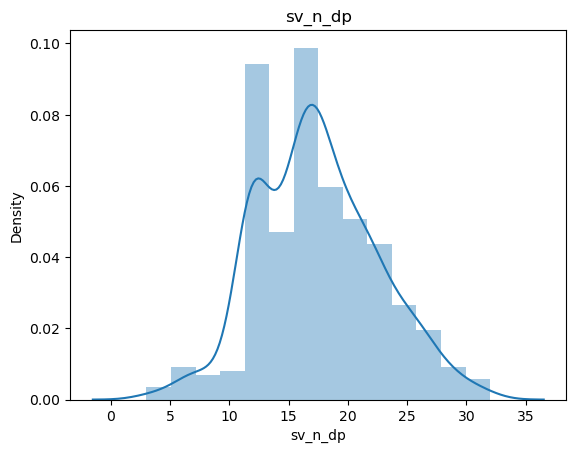

/Users/brigitte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


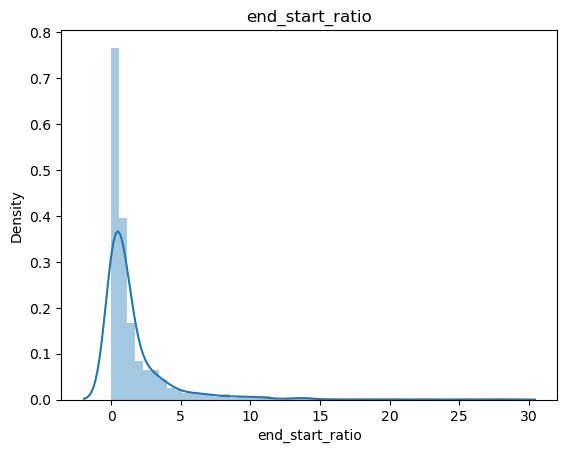

In [3]:
column_names = bk_behaviour_m2.columns[-13:]

for column_name in column_names:
    sns.distplot(bk_behaviour_m2[column_name])
    plt.title(column_name)
    plt.show()

In [138]:
bk_behaviour_m2.to_csv('../../Data/master_data/bk_behaviour_sc.csv', index = False)

In [5]:
customer1 = pd.read_csv('../../Data/master_data/twm_customer.csv', sep = ';')

In [4]:
# filter the bk_behaviour_m2 dataframe to include only records where acct_type is 'CC'
bk_behaviour_m2_cc = bk_behaviour_m2[bk_behaviour_m2['acct_type'] == 'CC']
bk_behaviour_m2_cc.head()

,cust_id,acct_nbr,acct_type,account_active,starting_balance,ending_balance,cc_av_wd,cc_av_pm,cc_n_wd,cc_n_pm,cq_av_wd,cq_av_dp,cq_n_wd,cq_n_dp,sv_av_wd,sv_av_dp,sv_n_wd,sv_n_dp,end_start_ratio
1,1362709,4561143213627090,CC,1,266.34,496.15,-112.667500,356.720000,40.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.862844
2,1362836,4561143213628360,CC,1,55.90,1000.00,-80.719583,93.571667,24.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.889088
4,1363361,4561143213633610,CC,1,849.37,462.28,-150.086563,472.892727,32.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.544262
5,1363102,4561143213631020,CC,1,0.00,1000.00,-117.327778,55.950000,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1363327,4561143213633270,CC,1,0.00,3000.00,-109.640833,133.435000,36.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# perform the left join on cust_id
merged_df = pd.merge(customer1, bk_behaviour_m2_cc, on='cust_id', how='left')
columns = merged_df.columns
print(columns)

Index(['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status', 'name_prefix', 'first_name', 'last_name',
       'street_nbr', 'street_name', 'postal_code', 'city_name', 'state_code',
       'acct_nbr', 'acct_type', 'account_active', 'starting_balance',
       'ending_balance', 'cc_av_wd', 'cc_av_pm', 'cc_n_wd', 'cc_n_pm',
       'cq_av_wd', 'cq_av_dp', 'cq_n_wd', 'cq_n_dp', 'sv_av_wd', 'sv_av_dp',
       'sv_n_wd', 'sv_n_dp', 'end_start_ratio'],
      dtype='object')


In [7]:
# rename columns
merged_df.rename(columns={'acct_nbr': 'cc_acct_nbr',
                         'account_active': 'cc_acct_active',
                         'starting_balance': 'cc_starting_balance',
                         'ending_balance': 'cc_ending_balance',
                         'end_start_ratio': 'cc_end_start_ratio'}, inplace=True)
columns = merged_df.columns
print(columns)

Index(['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status', 'name_prefix', 'first_name', 'last_name',
       'street_nbr', 'street_name', 'postal_code', 'city_name', 'state_code',
       'cc_acct_nbr', 'acct_type', 'cc_acct_active', 'cc_starting_balance',
       'cc_ending_balance', 'cc_av_wd', 'cc_av_pm', 'cc_n_wd', 'cc_n_pm',
       'cq_av_wd', 'cq_av_dp', 'cq_n_wd', 'cq_n_dp', 'sv_av_wd', 'sv_av_dp',
       'sv_n_wd', 'sv_n_dp', 'cc_end_start_ratio'],
      dtype='object')


In [8]:
# select only the specified columns
merged_df = merged_df[['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children', 'gender', 'marital_status', 'state_code', 'cc_acct_nbr', 'cc_acct_active', 'cc_starting_balance', 'cc_ending_balance', 'cc_av_wd', 'cc_av_pm', 'cc_n_wd', 'cc_n_pm', 'cc_end_start_ratio']]
columns = merged_df.columns
print(columns)

Index(['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status', 'state_code', 'cc_acct_nbr', 'cc_acct_active',
       'cc_starting_balance', 'cc_ending_balance', 'cc_av_wd', 'cc_av_pm',
       'cc_n_wd', 'cc_n_pm', 'cc_end_start_ratio'],
      dtype='object')


In [9]:
merged_df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,state_code,cc_acct_nbr,cc_acct_active,cc_starting_balance,cc_ending_balance,cc_av_wd,cc_av_pm,cc_n_wd,cc_n_pm,cc_end_start_ratio
0,1362691,26150,46,5,1,M,2,NV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1362487,6605,71,1,0,M,2,CA,4.561143e+15,1.0,0.00,1548.23,-121.323077,404.7025,26.0,4.0,NaN
2,1363160,18548,38,8,0,F,1,CA,4.561143e+15,1.0,657.46,286.69,-116.605000,536.9575,52.0,12.0,0.436057
3,1362752,47668,54,3,0,F,1,CA,4.561143e+15,0.0,2302.14,0.00,-188.800000,1073.6625,10.0,4.0,0.000000
4,1362548,44554,59,9,2,F,4,NY,4.561143e+15,1.0,6965.25,68.68,-312.028462,1379.2025,13.0,8.0,0.009860


In [10]:
# filter the bk_behaviour_m2 dataframe to include only records where acct_type is 'CK'
bk_behaviour_m2_cq = bk_behaviour_m2[bk_behaviour_m2['acct_type'] == 'CK']
bk_behaviour_m2_cq.head()


,cust_id,acct_nbr,acct_type,account_active,starting_balance,ending_balance,cc_av_wd,cc_av_pm,cc_n_wd,cc_n_pm,cq_av_wd,cq_av_dp,cq_n_wd,cq_n_dp,sv_av_wd,sv_av_dp,sv_n_wd,sv_n_dp,end_start_ratio
3,1363311,13633112,CK,1,11017.13,968.46,NaN,NaN,NaN,NaN,-271.653559,284.709048,59.0,21.0,NaN,NaN,NaN,NaN,0.087905
7,1362897,13628972,CK,1,152.12,52.33,NaN,NaN,NaN,NaN,-44.427188,195.967857,64.0,14.0,NaN,NaN,NaN,NaN,0.344005
9,1362720,13627202,CK,1,1074.16,216.74,NaN,NaN,NaN,NaN,-48.464306,202.462308,72.0,13.0,NaN,NaN,NaN,NaN,0.201776
11,1362945,13629452,CK,1,204.67,375.14,NaN,NaN,NaN,NaN,-52.889420,201.044211,69.0,19.0,NaN,NaN,NaN,NaN,1.832902
18,1362591,13625912,CK,1,3390.49,920.44,NaN,NaN,NaN,NaN,-139.821525,262.700909,59.0,22.0,NaN,NaN,NaN,NaN,0.271477


In [13]:
# perform the left join on cust_id
columns_to_keep = ['cust_id', 'cq_av_wd', 'cq_av_dp', 'cq_n_wd', 'cq_n_dp', 'end_start_ratio', 'acct_nbr', 'account_active', 'starting_balance', 'ending_balance']
bk_behaviour_m2_cq_filtered = bk_behaviour_m2_cq[columns_to_keep]
merged_df2 = pd.merge(merged_df, bk_behaviour_m2_cq_filtered, on='cust_id', how='left')
columns = merged_df2.columns
print(columns)

Index(['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status', 'state_code', 'cc_acct_nbr', 'cc_acct_active',
       'cc_starting_balance', 'cc_ending_balance', 'cc_av_wd', 'cc_av_pm',
       'cc_n_wd', 'cc_n_pm', 'cc_end_start_ratio', 'cq_av_wd', 'cq_av_dp',
       'cq_n_wd', 'cq_n_dp', 'end_start_ratio', 'acct_nbr', 'account_active',
       'starting_balance', 'ending_balance'],
      dtype='object')


In [14]:
# rename columns
merged_df2.rename(columns={'acct_nbr': 'cq_acct_nbr',
                         'account_active': 'cq_acct_active',
                         'starting_balance': 'cq_starting_balance',
                         'ending_balance': 'cq_ending_balance',
                         'end_start_ratio': 'cq_end_start_ratio'}, inplace=True)
columns = merged_df2.columns
print(columns)

Index(['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status', 'state_code', 'cc_acct_nbr', 'cc_acct_active',
       'cc_starting_balance', 'cc_ending_balance', 'cc_av_wd', 'cc_av_pm',
       'cc_n_wd', 'cc_n_pm', 'cc_end_start_ratio', 'cq_av_wd', 'cq_av_dp',
       'cq_n_wd', 'cq_n_dp', 'cq_end_start_ratio', 'cq_acct_nbr',
       'cq_acct_active', 'cq_starting_balance', 'cq_ending_balance'],
      dtype='object')


In [15]:
# filter the bk_behaviour_m2 dataframe to include only records where acct_type is 'SV'
bk_behaviour_m2_sv = bk_behaviour_m2[bk_behaviour_m2['acct_type'] == 'SV']
bk_behaviour_m2_sv.head()

,cust_id,acct_nbr,acct_type,account_active,starting_balance,ending_balance,cc_av_wd,cc_av_pm,cc_n_wd,cc_n_pm,cq_av_wd,cq_av_dp,cq_n_wd,cq_n_dp,sv_av_wd,sv_av_dp,sv_n_wd,sv_n_dp,end_start_ratio
0,1362806,13628063,SV,1,1430.22,284.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-172.314375,84.810000,16.0,19.0,0.198976
12,1362641,13626413,SV,0,139.95,141.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.179091,NaN,11.0,1.014076
13,1363377,13633773,SV,1,610.91,1782.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-125.252000,105.777647,5.0,17.0,2.917058
15,1362940,13629403,SV,1,165.68,778.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-73.843333,52.842500,6.0,20.0,4.700869
20,1362823,13628233,SV,1,428.17,491.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-342.350000,68.195000,3.0,16.0,1.148796


In [16]:
# perform the left join on cust_id
columns_to_keep = ['cust_id', 'sv_av_wd', 'sv_av_dp', 'sv_n_wd', 'sv_n_dp', 'end_start_ratio', 'acct_nbr', 'account_active', 'starting_balance', 'ending_balance']
bk_behaviour_m2_sv_filtered = bk_behaviour_m2_sv[columns_to_keep]
merged_df3 = pd.merge(merged_df2, bk_behaviour_m2_sv_filtered, on='cust_id', how='left')
columns = merged_df3.columns
print(columns)

Index(['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status', 'state_code', 'cc_acct_nbr', 'cc_acct_active',
       'cc_starting_balance', 'cc_ending_balance', 'cc_av_wd', 'cc_av_pm',
       'cc_n_wd', 'cc_n_pm', 'cc_end_start_ratio', 'cq_av_wd', 'cq_av_dp',
       'cq_n_wd', 'cq_n_dp', 'cq_end_start_ratio', 'cq_acct_nbr',
       'cq_acct_active', 'cq_starting_balance', 'cq_ending_balance',
       'sv_av_wd', 'sv_av_dp', 'sv_n_wd', 'sv_n_dp', 'end_start_ratio',
       'acct_nbr', 'account_active', 'starting_balance', 'ending_balance'],
      dtype='object')


In [17]:
# rename columns
merged_df3.rename(columns={'acct_nbr': 'sv_acct_nbr',
                         'account_active': 'sv_acct_active',
                         'starting_balance': 'sv_starting_balance',
                         'ending_balance': 'sv_ending_balance',
                         'end_start_ratio': 'sv_end_start_ratio'}, inplace=True)
columns = merged_df3.columns
print(columns)

Index(['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status', 'state_code', 'cc_acct_nbr', 'cc_acct_active',
       'cc_starting_balance', 'cc_ending_balance', 'cc_av_wd', 'cc_av_pm',
       'cc_n_wd', 'cc_n_pm', 'cc_end_start_ratio', 'cq_av_wd', 'cq_av_dp',
       'cq_n_wd', 'cq_n_dp', 'cq_end_start_ratio', 'cq_acct_nbr',
       'cq_acct_active', 'cq_starting_balance', 'cq_ending_balance',
       'sv_av_wd', 'sv_av_dp', 'sv_n_wd', 'sv_n_dp', 'sv_end_start_ratio',
       'sv_acct_nbr', 'sv_acct_active', 'sv_starting_balance',
       'sv_ending_balance'],
      dtype='object')


In [18]:
merged_df3.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,state_code,cc_acct_nbr,cc_acct_active,...,cq_ending_balance,sv_av_wd,sv_av_dp,sv_n_wd,sv_n_dp,sv_end_start_ratio,sv_acct_nbr,sv_acct_active,sv_starting_balance,sv_ending_balance
0,1362691,26150,46,5,1,M,2,NV,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1362487,6605,71,1,0,M,2,CA,4.561143e+15,1.0,...,1401.21,-109.025714,15.542500,7.0,8.0,0.019778,13624873.0,0.0,651.73,12.89
2,1363160,18548,38,8,0,F,1,CA,4.561143e+15,1.0,...,NaN,-66.318000,58.080870,20.0,23.0,1.084041,13631603.0,1.0,113.04,122.54
3,1362752,47668,54,3,0,F,1,CA,4.561143e+15,0.0,...,3.76,NaN,0.755833,NaN,12.0,1.015110,13627523.0,1.0,600.26,609.33
4,1362548,44554,59,9,2,F,4,NY,4.561143e+15,1.0,...,569.65,NaN,0.315000,NaN,12.0,1.015105,13625483.0,1.0,250.24,254.02


In [19]:
merged_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 0 to 746
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cust_id              747 non-null    int64  
 1   income               747 non-null    int64  
 2   age                  747 non-null    int64  
 3   years_with_bank      747 non-null    int64  
 4   nbr_children         747 non-null    int64  
 5   gender               747 non-null    object 
 6   marital_status       747 non-null    int64  
 7   state_code           747 non-null    object 
 8   cc_acct_nbr          468 non-null    float64
 9   cc_acct_active       468 non-null    float64
 10  cc_starting_balance  468 non-null    float64
 11  cc_ending_balance    468 non-null    float64
 12  cc_av_wd             435 non-null    float64
 13  cc_av_pm             450 non-null    float64
 14  cc_n_wd              435 non-null    float64
 15  cc_n_pm              450 non-null    flo

In [20]:
merged_df3 = merged_df3.dropna(subset=['cc_acct_nbr', 'cq_acct_nbr', 'sv_acct_nbr'], how='all')
merged_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 1 to 746
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cust_id              665 non-null    int64  
 1   income               665 non-null    int64  
 2   age                  665 non-null    int64  
 3   years_with_bank      665 non-null    int64  
 4   nbr_children         665 non-null    int64  
 5   gender               665 non-null    object 
 6   marital_status       665 non-null    int64  
 7   state_code           665 non-null    object 
 8   cc_acct_nbr          468 non-null    float64
 9   cc_acct_active       468 non-null    float64
 10  cc_starting_balance  468 non-null    float64
 11  cc_ending_balance    468 non-null    float64
 12  cc_av_wd             435 non-null    float64
 13  cc_av_pm             450 non-null    float64
 14  cc_n_wd              435 non-null    float64
 15  cc_n_pm              450 non-null    flo

In [94]:
# cc_cols = ['cc_acct_active', 'cc_starting_balance', 'cc_ending_balance', 'cc_av_wd', 'cc_av_pm', 'cc_n_wd', 'cc_n_pm', 'cc_end_start_ratio']
# merged_df3.loc[merged_df3['cc_acct_nbr'].isna(), cc_cols] = 0

In [95]:
# cc_cols = ['cq_acct_active', 'cq_starting_balance', 'cq_ending_balance', 'cq_av_wd', 'cq_av_dp', 'cq_n_wd', 'cq_n_dp', 'cq_end_start_ratio']
# merged_df3.loc[merged_df3['cq_acct_nbr'].isna(), cc_cols] = 0

In [96]:
# cc_cols = ['sv_acct_active', 'sv_starting_balance', 'sv_ending_balance', 'sv_av_wd', 'sv_av_dp', 'sv_n_wd', 'sv_n_dp', 'sv_end_start_ratio']
# merged_df3.loc[merged_df3['sv_acct_nbr'].isna(), cc_cols] = 0

In [97]:
# end_start_ratio_cols = ['sv_end_start_ratio', 'cq_end_start_ratio', 'cc_end_start_ratio']
# merged_df3[end_start_ratio_cols] = merged_df3[end_start_ratio_cols].fillna(0)

In [99]:
# cols_to_fill = ['cc_av_wd', 'cc_av_pm', 'cc_n_wd', 'cc_n_pm', 'cq_av_wd', 'cq_av_dp', 'cq_n_wd', 'cq_n_dp','sv_av_wd', 'sv_av_dp', 'sv_n_wd', 'sv_n_dp']
# merged_df3[cols_to_fill] = merged_df3[cols_to_fill].fillna(0)

In [ ]:
# merged_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 1 to 746
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cust_id              665 non-null    int64  
 1   income               665 non-null    int64  
 2   age                  665 non-null    int64  
 3   years_with_bank      665 non-null    int64  
 4   nbr_children         665 non-null    int64  
 5   gender               665 non-null    object 
 6   marital_status       665 non-null    int64  
 7   state_code           665 non-null    object 
 8   cc_acct_nbr          468 non-null    float64
 9   cc_acct_active       665 non-null    float64
 10  cc_starting_balance  665 non-null    float64
 11  cc_ending_balance    665 non-null    float64
 12  cc_av_wd             665 non-null    float64
 13  cc_av_pm             665 non-null    float64
 14  cc_n_wd              665 non-null    float64
 15  cc_n_pm              665 non-null    flo

In [21]:
merged_df3.to_csv('../../Data/master_data/bk_behaviour_final1.csv', index = False)

In [22]:
bk_behaviour_f1 = pd.read_csv('../../Data/master_data/bk_behaviour_final1.csv')

In [27]:
bk_behaviour_f1['has_cq'] = bk_behaviour_f1['cq_acct_nbr'].apply(lambda x: 1 if pd.notnull(x) else 0)
bk_behaviour_f1['has_cc'] = bk_behaviour_f1['cc_acct_nbr'].apply(lambda x: 1 if pd.notnull(x) else 0)
bk_behaviour_f1['has_sv'] = bk_behaviour_f1['sv_acct_nbr'].apply(lambda x: 1 if pd.notnull(x) else 0)

bk_behaviour_f1[['cc_av_wd', 'cq_av_wd', 'sv_av_wd']] = bk_behaviour_f1[['cc_av_wd', 'cq_av_wd', 'sv_av_wd']].fillna(0)
bk_behaviour_f1['av_spending'] = bk_behaviour_f1[['cc_av_wd', 'cq_av_wd', 'sv_av_wd']].mean(axis=1)

bk_behaviour_f1[['cc_av_pm', 'cq_av_dp', 'sv_av_dp']] = bk_behaviour_f1[['cc_av_pm', 'cq_av_dp', 'sv_av_dp']].fillna(0)
bk_behaviour_f1['av_deposit'] = bk_behaviour_f1[['cc_av_pm', 'cq_av_dp', 'sv_av_dp']].mean(axis=1)

bk_behaviour_f1[['cc_n_wd', 'cq_n_wd', 'sv_n_wd']] = bk_behaviour_f1[['cc_n_wd', 'cq_n_wd', 'sv_n_wd']].fillna(0)
bk_behaviour_f1['n_spending'] = bk_behaviour_f1['cc_n_wd'] + bk_behaviour_f1['cq_n_wd'] + bk_behaviour_f1['sv_n_wd']

bk_behaviour_f1[['cc_n_pm', 'cq_n_dp', 'sv_n_dp']] = bk_behaviour_f1[['cc_n_pm', 'cq_n_dp', 'sv_n_dp']].fillna(0)
bk_behaviour_f1['n_deposit'] = bk_behaviour_f1['cc_n_pm'] + bk_behaviour_f1['cq_n_dp'] + bk_behaviour_f1['sv_n_dp']

bk_behaviour_f1[['cc_ending_balance', 'cq_ending_balance', 'sv_ending_balance']] = bk_behaviour_f1[['cc_ending_balance', 'cq_ending_balance', 'sv_ending_balance']].fillna(0)
bk_behaviour_f1['total_balance_sept'] = bk_behaviour_f1['cq_ending_balance'] + bk_behaviour_f1['sv_ending_balance'] - bk_behaviour_f1['cc_ending_balance']

bk_behaviour_f1.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,state_code,cc_acct_nbr,cc_acct_active,...,sv_starting_balance,sv_ending_balance,has_cq,has_cc,has_sv,av_spending,av_deposit,n_spending,n_deposit,total_balance_sept
0,1362487,6605,71,1,0,M,2,CA,4.561143e+15,1.0,...,651.73,12.89,1,1,1,-100.863764,162.297619,65.0,26.0,-134.13
1,1363160,18548,38,8,0,F,1,CA,4.561143e+15,1.0,...,113.04,122.54,0,1,1,-60.974333,198.346123,72.0,35.0,-164.15
2,1362752,47668,54,3,0,F,1,CA,4.561143e+15,0.0,...,600.26,609.33,1,1,1,-94.203582,599.864028,77.0,24.0,613.09
3,1362548,44554,59,9,2,F,4,NY,4.561143e+15,1.0,...,250.24,254.02,1,1,1,-162.877530,538.885972,76.0,44.0,754.99
4,1363017,0,16,1,0,M,1,CA,4.561143e+15,1.0,...,2011.02,2901.35,1,1,1,-97.361694,255.647450,118.0,42.0,2048.50


In [286]:
bk_behaviour_f1.iloc[:, -5:].head()

,av_spending,av_deposit,n_spending,n_deposit,total_balance_sept
0,-100.863764,162.297619,65.0,26.0,-134.13
1,-60.974333,198.346123,72.0,35.0,-164.15
2,-94.203582,599.864028,77.0,24.0,613.09
3,-162.877530,538.885972,76.0,44.0,754.99
4,-97.361694,255.647450,118.0,42.0,2048.50


In [287]:
bk_behaviour_f2.iloc[:, -5:].head()

,av_spending,av_deposit,n_spending,n_deposit,total_balance_sept
0,0.636316,0.193015,0.389222,0.419355,0.454142
1,0.780145,0.235886,0.431138,0.564516,0.451597
2,0.660331,0.713396,0.461078,0.387097,0.517496
3,0.412714,0.640877,0.455090,0.709677,0.529528
4,0.648944,0.304032,0.706587,0.677419,0.639200


In [28]:
bk_behaviour_f1.to_csv('../../Data/master_data/bk_behaviour_final2.csv', index = False)

In [4]:
bk_behaviour_f2 = pd.read_csv('../../Data/master_data/bk_behaviour_final2.csv')

In [5]:
# Find outliers and remove them
column_names = bk_behaviour_f2.columns[-5:]
for column_name in column_names:
    z_score = stats.zscore(bk_behaviour_f2[column_name])
    abs_z_score = np.abs(z_score)
    outliers = bk_behaviour_f2[abs_z_score > 3]
    if len(outliers) > 0:
        print(f"Outliers found in column: {column_name}")
        print(f"Outlier values: {outliers[column_name].tolist()}")
        bk_behaviour_f2 = bk_behaviour_f2[abs_z_score <= 3]
    else:
        print(f"No outliers found in column: {column_name}")

Outliers found in column: av_spending
Outlier values: [-307.9365481481482, -316.4144309508359, -334.43156084656084, -494.98532094594594, -429.5704802259887, -388.6094459623558, -329.90246327683616, -312.96873873873875, -392.7653125, -397.8151162710699, -322.04453205128203, -324.25789669087976, -297.7296103896104, -474.30017592592594, -395.1706002554279]
Outliers found in column: av_deposit
Outlier values: [938.2033333333334, 1002.3599127140974, 3026.521388888889, 1224.6958333333332, 1371.4947666666667, 1694.542888888889, 1125.969513888889, 992.8833333333332]
No outliers found in column: n_spending
No outliers found in column: n_deposit
Outliers found in column: total_balance_sept
Outlier values: [-8450.92, 9524.57, 8946.69, 13887.73, 6690.110000000001, 9253.73, 7681.509999999998, 6738.909999999999, -6754.55, 8866.27, 9355.0, 11444.58, 7471.81, -9153.52]


In [6]:
bk_behaviour_f2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 664
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           628 non-null    int64  
 1   cust_id              628 non-null    int64  
 2   income               628 non-null    int64  
 3   age                  628 non-null    int64  
 4   years_with_bank      628 non-null    int64  
 5   nbr_children         628 non-null    int64  
 6   gender               628 non-null    object 
 7   marital_status       628 non-null    int64  
 8   state_code           628 non-null    object 
 9   cc_acct_nbr          437 non-null    float64
 10  cc_acct_active       437 non-null    float64
 11  cc_starting_balance  437 non-null    float64
 12  cc_ending_balance    628 non-null    float64
 13  cc_av_wd             628 non-null    float64
 14  cc_av_pm             628 non-null    float64
 15  cc_n_wd              628 non-null    flo

In [7]:
# Select the columns to scale
cols_to_scale = ['av_spending', 'av_deposit', 'n_spending', 'n_deposit', 'total_balance_sept']

# Create a scaler object
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the selected columns and transform the values
bk_behaviour_f2[cols_to_scale] = scaler.fit_transform(bk_behaviour_f2[cols_to_scale])
bk_behaviour_f2.head()

,Unnamed: 0,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,state_code,cc_acct_nbr,...,sv_starting_balance,sv_ending_balance,has_cq,has_cc,has_sv,av_spending,av_deposit,n_spending,n_deposit,total_balance_sept
0,0,1362487,6605,71,1,0,M,2,CA,4.561143e+15,...,651.73,12.89,1,1,1,0.636316,0.193015,0.389222,0.419355,0.454142
1,1,1363160,18548,38,8,0,F,1,CA,4.561143e+15,...,113.04,122.54,0,1,1,0.780145,0.235886,0.431138,0.564516,0.451597
2,2,1362752,47668,54,3,0,F,1,CA,4.561143e+15,...,600.26,609.33,1,1,1,0.660331,0.713396,0.461078,0.387097,0.517496
3,3,1362548,44554,59,9,2,F,4,NY,4.561143e+15,...,250.24,254.02,1,1,1,0.412714,0.640877,0.455090,0.709677,0.529528
4,4,1363017,0,16,1,0,M,1,CA,4.561143e+15,...,2011.02,2901.35,1,1,1,0.648944,0.304032,0.706587,0.677419,0.639200


In [59]:
bk_behaviour_f2.to_csv('../../Data/master_data/bk_behaviour_final3.csv', index = False)

In [8]:
bk_behaviour_f3 = pd.read_csv('../../Data/master_data/bk_behaviour_final3.csv')

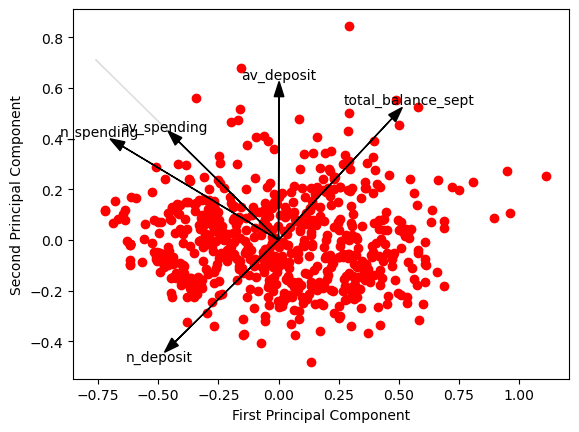

In [9]:
# Select the last 8 columns of bk_behaviour_f3
cols_to_pca = bk_behaviour_f3.columns[-5:]
bk_behaviour_f3_pca = bk_behaviour_f3[cols_to_pca]

# Perform PCA on the selected columns
pca = PCA()
pca.fit(bk_behaviour_f3_pca)

# Project the data onto the first two principal components
bk_behaviour_f3_pca = pca.transform(bk_behaviour_f3_pca)[:, :2]

# Create a scatter plot to visualize the data
plt.scatter(bk_behaviour_f3_pca[:, 0], bk_behaviour_f3_pca[:, 1], c='red')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

eigenvalues = pca.explained_variance_ratio_
eigenvectors = pca.components_

# Plot the eigenvectors as arrows
for i, eigenvector in enumerate(eigenvectors[:5, :]):
    plt.arrow(0, 0, eigenvector[0] * eigenvalues[i] * 3, eigenvector[1] * eigenvalues[i] * 3, color='black', alpha=0.1)
    
# Add labels to the eigenvectors
for i, eigenvector in enumerate(eigenvectors[:5]):
    plt.arrow(0, 0, eigenvector[0], eigenvector[1], color='black', head_width=0.04)
    plt.text(eigenvector[0] * 1.15, eigenvector[1] * 1.15, cols_to_pca[i], color='black', ha='center', va='center')

    
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)

print()
for i, col in enumerate(bk_behaviour_f3.columns[-5:]):
    print(col, eigenvectors[i])


[0.60735266 0.16468684 0.13304937 0.06611375 0.02879738]

av_spending [-0.41530786  0.38894747  0.61691032  0.54362515 -0.01151541]
av_deposit [ 0.00225842  0.56549394  0.21553474 -0.65698267 -0.44958875]
n_spending [-0.64795339  0.36945728 -0.59913097 -0.07348217  0.28160285]
n_deposit [-0.42983396 -0.40242424 -0.16604752  0.13145555 -0.78002895]
total_balance_sept [ 0.47213711  0.48009637 -0.43178319  0.50016525 -0.33165045]


In [290]:
print()
for i, col in enumerate(bk_behaviour_f3.columns[-5:]):
    print(col, eigenvalues[i])


av_spending 0.6073526649481495
av_deposit 0.1646868380920368
n_spending 0.13304937050249538
n_deposit 0.06611374784669614
total_balance_sept 0.028797378610622114


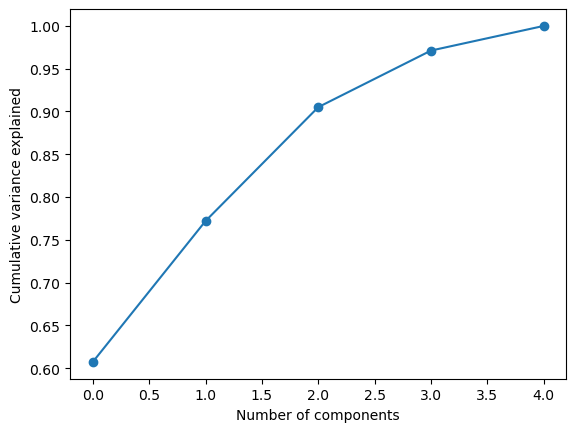

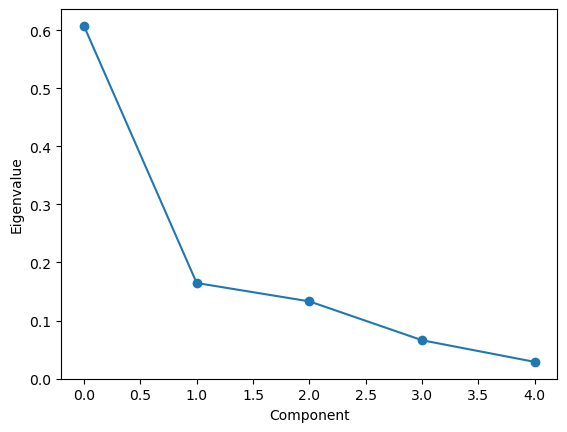

In [291]:
eigenvalues = [0.6073526649481495, 0.1646868380920368, 0.13304937050249538, 0.06611374784669614, 0.028797378610622114]

plt.plot(eigenvalues, 'o-')
plt.xlabel('Component')
plt.ylabel('Eigenvalue')
plt.show()

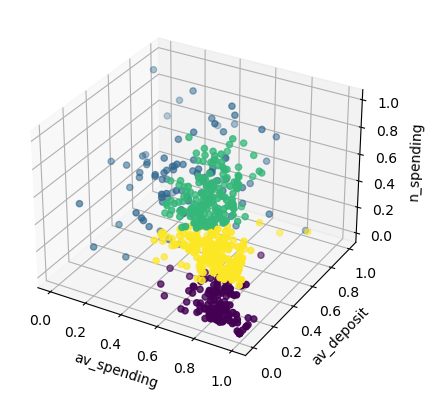

In [10]:
# Select the last 5 columns of bk_behaviour_f3
cols_to_cluster = bk_behaviour_f3.columns[-5:-2]
bk_behaviour_f3_cluster = bk_behaviour_f3[cols_to_cluster]

# Perform K-Means clustering with k = 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(bk_behaviour_f3_cluster)

# Get the cluster assignments for each sample
clusters = kmeans.predict(bk_behaviour_f3_cluster)

# Create a 3D scatter plot to visualize the data and clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bk_behaviour_f3_cluster.iloc[:, 0], bk_behaviour_f3_cluster.iloc[:, 1], bk_behaviour_f3_cluster.iloc[:, 2], c=clusters)
ax.set_xlabel(bk_behaviour_f3_cluster.columns[0])
ax.set_ylabel(bk_behaviour_f3_cluster.columns[1])
ax.set_zlabel(bk_behaviour_f3_cluster.columns[2])
plt.show()

In [305]:
bk_behaviour_f3_cluster.head()

,av_spending,av_deposit,n_spending
0,0.636316,0.193015,0.389222
1,0.780145,0.235886,0.431138
2,0.660331,0.713396,0.461078
3,0.412714,0.640877,0.455090
4,0.648944,0.304032,0.706587


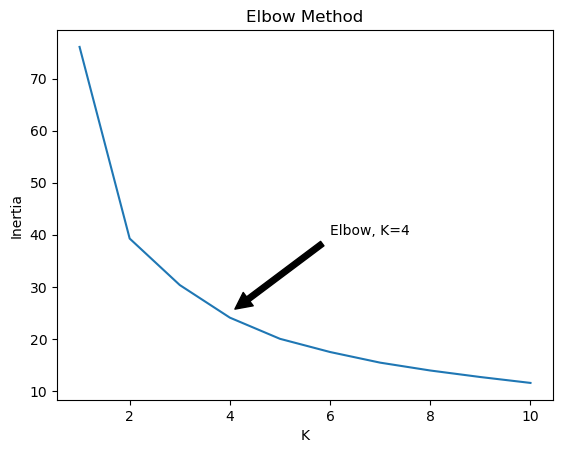

In [11]:
# Create an empty list to store the WCSS for each value of k
wcss = []

# Fit the K-means model for k values from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(bk_behaviour_f3_cluster)
    wcss.append(kmeans.inertia_)

# Plot the WCSS for each value of k
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.annotate('Elbow, K=4', xy=(4, 25), xytext=(6, 40), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Inertia");
plt.show()

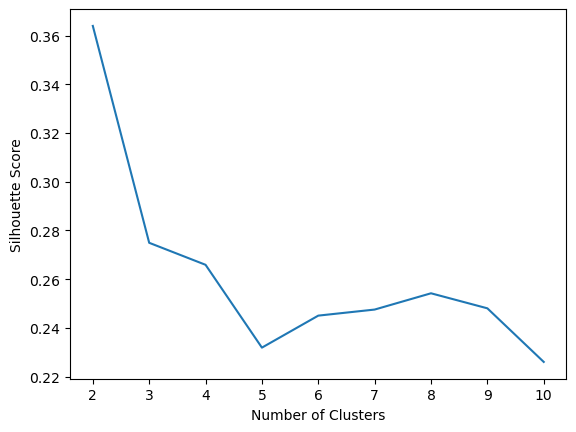

In [190]:
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(bk_behaviour_f3_cluster)
    silhouette_score_ = silhouette_score(bk_behaviour_f3_cluster, kmeans.labels_)
    silhouette_scores.append(silhouette_score_)

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

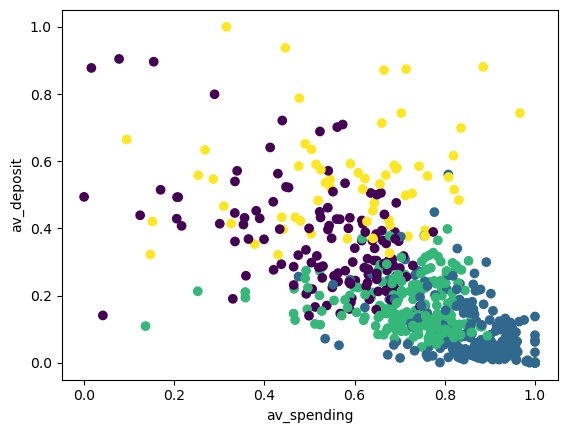

In [163]:
# Select the last 5 columns of bk_behaviour_f3
cols_to_cluster = bk_behaviour_f3.columns[-5:]
bk_behaviour_f3_cluster = bk_behaviour_f3[cols_to_cluster]

# Perform K-Means clustering with k = 3
kmeans = KMeans(n_clusters=4)
kmeans.fit(bk_behaviour_f3_cluster)

# Get the cluster assignments for each sample
clusters = kmeans.predict(bk_behaviour_f3_cluster)

# Create a scatter plot to visualize the data and clusters
plt.scatter(bk_behaviour_f3_cluster.iloc[:, 0], bk_behaviour_f3_cluster.iloc[:, 1], c=clusters)
plt.xlabel(bk_behaviour_f3_cluster.columns[0])
plt.ylabel(bk_behaviour_f3_cluster.columns[1])
plt.show()

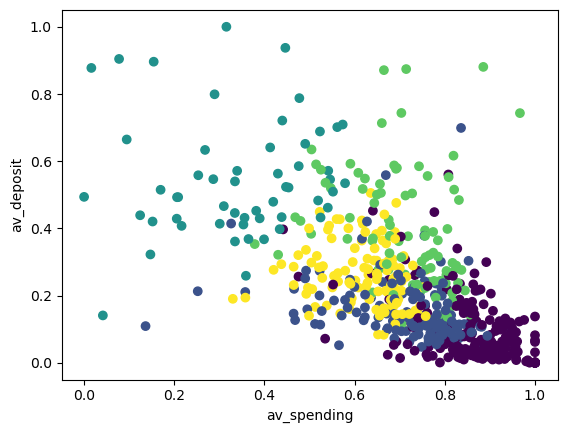

In [134]:
# Select the last 5 columns of bk_behaviour_f3
cols_to_cluster = bk_behaviour_f3.columns[-5:]
bk_behaviour_f3_cluster = bk_behaviour_f3[cols_to_cluster]

# Perform K-Means clustering with k = 3
kmeans = KMeans(n_clusters=5)
kmeans.fit(bk_behaviour_f3_cluster)

# Get the cluster assignments for each sample
clusters = kmeans.predict(bk_behaviour_f3_cluster)

# Create a scatter plot to visualize the data and clusters
plt.scatter(bk_behaviour_f3_cluster.iloc[:, 0], bk_behaviour_f3_cluster.iloc[:, 1], c=clusters)
plt.xlabel(bk_behaviour_f3_cluster.columns[0])
plt.ylabel(bk_behaviour_f3_cluster.columns[1])
plt.show()

In [310]:
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a dataframe with the cluster centers and the variable names as columns
cluster_centers_df = pd.DataFrame(cluster_centers, columns=bk_behaviour_f3_cluster.columns)

# Print the cluster centers for each variable
print(cluster_centers_df)

   av_spending  av_deposit  n_spending
0     0.672557    0.299050    0.668197
1     0.858158    0.068289    0.097367
2     0.776984    0.149941    0.384426
3     0.416422    0.518348    0.533070


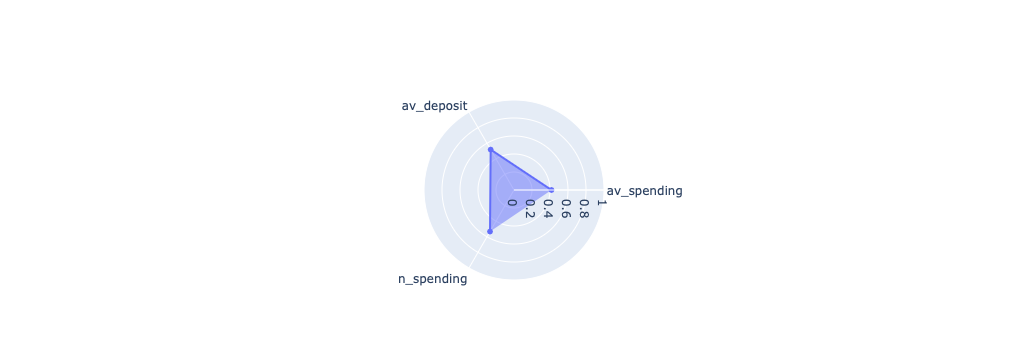

In [15]:
categories = ['av_spending',  'av_deposit',  'n_spending']

fig = go.Figure()

# fig.add_trace(go.Scatterpolar(
#       r=[0.672557, 0.299050, 0.668197],
#       theta=categories,
#       fill='toself',
#       name='C1'))

# fig.add_trace(go.Scatterpolar(
#       r=[0.858158, 0.068289, 0.097367],
#       theta=categories,
#       fill='toself',
#       name='C2'))

# fig.add_trace(go.Scatterpolar(
#       r=[0.776984, 0.149941, 0.384426],
#       theta=categories,
#       fill='toself',
#       name='C3'))

fig.add_trace(go.Scatterpolar(
      r=[0.416422, 0.518348, 0.533070],
      theta=categories,
      fill='toself',
      name='C4'))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=False
)

fig.show()


In [2]:
bk_behaviour_f3_cluster.head()

NameError: name 'bk_behaviour_f3_cluster' is not defined

In [312]:
bk_behaviour_f3_cluster.describe()

,av_spending,av_deposit,n_spending
count,628.000000,628.000000,628.000000
mean,0.718227,0.221284,0.412172
std,0.182478,0.182884,0.233597
min,0.000000,0.000000,0.000000
25%,0.631925,0.087902,0.221557
50%,0.744452,0.174260,0.419162
75%,0.845598,0.298534,0.586826
max,1.000000,1.000000,1.000000


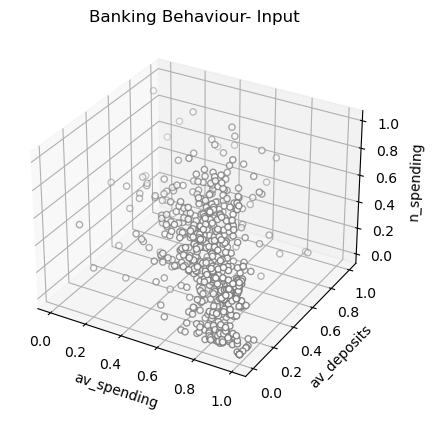

In [313]:
# Extract the first three columns of the DataFrame
data = bk_behaviour_f3_cluster.iloc[:, :3]

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot scatterplot
ax.scatter(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2], edgecolors='grey', facecolors='white')

# Add labels and title to the plot
ax.set_xlabel('av_spending')
ax.set_ylabel('av_deposits')
ax.set_zlabel('n_spending')
plt.title('Banking Behaviour- Input')

# Show the plot
plt.show()

In [314]:
# Select three random rows from the DataFrame
random_data = bk_behaviour_f3_cluster.sample(n=4)

# Show the selected data
print(random_data)

     av_spending  av_deposit  n_spending
86      0.705726    0.205660    0.275449
591     0.534597    0.071724    0.107784
450     0.953088    0.072663    0.425150
385     0.169691    0.514875    0.610778


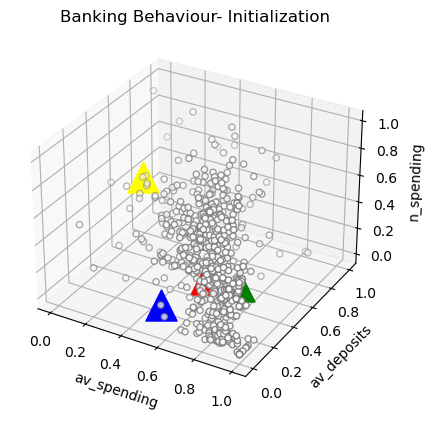

In [315]:
# Extract the first three columns of the DataFrame
data = bk_behaviour_f3_cluster.iloc[:, :3]

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the scatterplot
ax.scatter(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2], edgecolors='grey', facecolors='white')

# Plot the random data points with colored triangles on top
ax.scatter(random_data.iloc[0,0], random_data.iloc[0,1], random_data.iloc[0,2], marker='^', s=500, c='red')
ax.scatter(random_data.iloc[1,0], random_data.iloc[1,1], random_data.iloc[1,2], marker='^', s=500, c='blue')
ax.scatter(random_data.iloc[2,0], random_data.iloc[2,1], random_data.iloc[2,2], marker='^', s=500, c='green')
ax.scatter(random_data.iloc[3,0], random_data.iloc[3,1], random_data.iloc[3,2], marker='^', s=500, c='yellow')


# Add labels and title to the plot
ax.set_xlabel('av_spending')
ax.set_ylabel('av_deposits')
ax.set_zlabel('n_spending')
plt.title('Banking Behaviour- Initialization')

# Show the plot
plt.show()

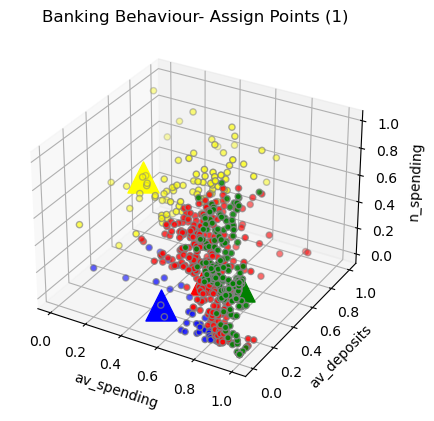

In [316]:
# Extract the first three columns of the DataFrame
data = bk_behaviour_f3_cluster.iloc[:, :3]

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Calculate the distances between the data points and the random points
distances = cdist(bk_behaviour_f3_cluster, random_data)

# Assign each data point to the closest random point
closest_random_index = np.argmin(distances, axis=1)

# Create a list of colors corresponding to each closest random point
colors = ['red', 'blue', 'green', 'yellow']
colors = [colors[i] for i in closest_random_index]

# Plot the scatterplot with the assigned colors
ax.scatter(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2], c=colors, edgecolors='grey')

# Plot the random data points with colored triangles on top
ax.scatter(random_data.iloc[0,0], random_data.iloc[0,1], random_data.iloc[0,2], marker='^', s=500, c='red')
ax.scatter(random_data.iloc[1,0], random_data.iloc[1,1], random_data.iloc[1,2], marker='^', s=500, c='blue')
ax.scatter(random_data.iloc[2,0], random_data.iloc[2,1], random_data.iloc[2,2], marker='^', s=500, c='green')
ax.scatter(random_data.iloc[3,0], random_data.iloc[3,1], random_data.iloc[3,2], marker='^', s=500, c='yellow')


# Add labels and title to the plot
ax.set_xlabel('av_spending')
ax.set_ylabel('av_deposits')
ax.set_zlabel('n_spending')
plt.title('Banking Behaviour- Assign Points (1)')

# Show the plot
plt.show()

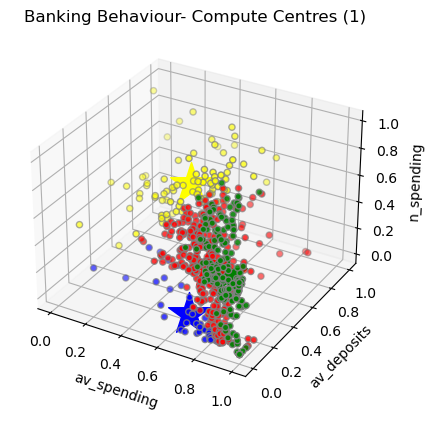

In [317]:
# Extract the first three columns of the DataFrame
data = bk_behaviour_f3_cluster.iloc[:, :3]

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Calculate the distances between the data points and the random points
distances = cdist(bk_behaviour_f3_cluster, random_data)

# Assign each data point to the closest random point
closest_random_index = np.argmin(distances, axis=1)

# Group the data points based on their assigned closest random point
grouped = bk_behaviour_f3_cluster.groupby(closest_random_index)

# Calculate the centroids for each group
centroids = grouped.mean().values

# Plot the centroids on the scatterplot
ax.scatter(centroids[0,0], centroids[0,1], centroids[0,2], marker='*', s=1000, c='red')
ax.scatter(centroids[1,0], centroids[1,1], centroids[1,2], marker='*', s=1000, c='blue')
ax.scatter(centroids[2,0], centroids[2,1], centroids[2,2], marker='*', s=1000, c='green')
ax.scatter(centroids[3,0], centroids[3,1], centroids[3,2], marker='*', s=1000, c='yellow')

# Plot the scatterplot with the assigned colors
ax.scatter(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2], c=colors, edgecolors='grey')

# Add labels and title to the plot
ax.set_xlabel('av_spending')
ax.set_ylabel('av_deposits')
ax.set_zlabel('n_spending')
plt.title('Banking Behaviour- Compute Centres (1)')

# Show the plot
plt.show()

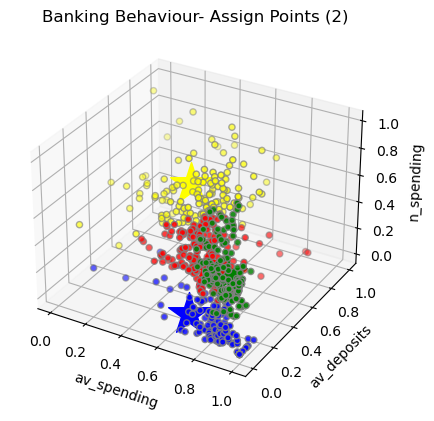

In [318]:
# Extract the first three columns of the DataFrame
data = bk_behaviour_f3_cluster.iloc[:, :3]

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Calculate the distances between the data points and the random points
distances = cdist(bk_behaviour_f3_cluster, centroids)

# Assign each data point to the closest random point
closest_random_index = np.argmin(distances, axis=1)

# Create a list of colors corresponding to each closest random point
colors = ['red', 'blue', 'green', 'yellow']
colors = [colors[i] for i in closest_random_index]

# Plot the scatterplot with the assigned colors
ax.scatter(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2], c=colors, edgecolors='grey')

# Plot the centroids on the scatterplot
ax.scatter(centroids[0,0], centroids[0,1], centroids[0,2], marker='*', s=1000, c='red')
ax.scatter(centroids[1,0], centroids[1,1], centroids[1,2], marker='*', s=1000, c='blue')
ax.scatter(centroids[2,0], centroids[2,1], centroids[2,2], marker='*', s=1000, c='green')
ax.scatter(centroids[3,0], centroids[3,1], centroids[3,2], marker='*', s=1000, c='yellow')


# Add labels and title to the plot
ax.set_xlabel('av_spending')
ax.set_ylabel('av_deposits')
ax.set_zlabel('n_spending')
plt.title('Banking Behaviour- Assign Points (2)')

# Show the plot
plt.show()

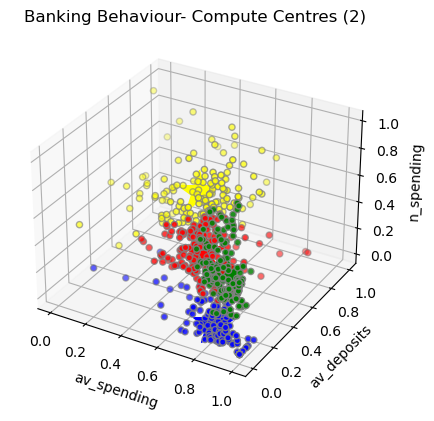

In [320]:
# Extract the first three columns of the DataFrame
data = bk_behaviour_f3_cluster.iloc[:, :3]

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Calculate the distances between the data points and the random points
distances = cdist(bk_behaviour_f3_cluster, centroids)

# Assign each data point to the closest random point
closest_random_index = np.argmin(distances, axis=1)

# Group the data points based on their assigned closest random point
grouped = bk_behaviour_f3_cluster.groupby(closest_random_index)

# Calculate the centroids for each group
centroids2 = grouped.mean().values

# Plot the centroids on the scatterplot
ax.scatter(centroids2[0,0], centroids2[0,1], centroids2[0,2], marker='*', s=1000, c='red')
ax.scatter(centroids2[1,0], centroids2[1,1], centroids2[1,2], marker='*', s=1000, c='blue')
ax.scatter(centroids2[2,0], centroids2[2,1], centroids2[2,2], marker='*', s=1000, c='green')
ax.scatter(centroids2[3,0], centroids2[3,1], centroids2[3,2], marker='*', s=1000, c='yellow')

# Plot the scatterplot with the assigned colors
ax.scatter(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2], c=colors, edgecolors='grey')

# Add labels and title to the plot
ax.set_xlabel('av_spending')
ax.set_ylabel('av_deposits')
ax.set_zlabel('n_spending')
plt.title('Banking Behaviour- Compute Centres (2)')

# Show the plot
plt.show()

In [325]:
print(centroids)

[[0.72000395 0.2090216  0.36982988]
 [0.67395986 0.09648982 0.08293413]
 [0.85803939 0.12608381 0.42402695]
 [0.445778   0.50823556 0.66409734]]


In [326]:
print(centroids2)

[[0.67684026 0.23220604 0.43921992]
 [0.82317274 0.07316088 0.08823781]
 [0.85116622 0.12586391 0.43951361]
 [0.51549462 0.4627768  0.6653032 ]]


In [327]:
print(centroids3)

[[0.65465086 0.23990515 0.47678465]
 [0.84582171 0.07615877 0.10183529]
 [0.85285854 0.11431406 0.40464904]
 [0.52474673 0.46730067 0.67500969]]


In [328]:
print(centroids4)

[[0.65189006 0.24131254 0.49993762]
 [0.84254915 0.07899312 0.10148735]
 [0.8482604  0.11559804 0.38902062]
 [0.52195055 0.47853259 0.67546725]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


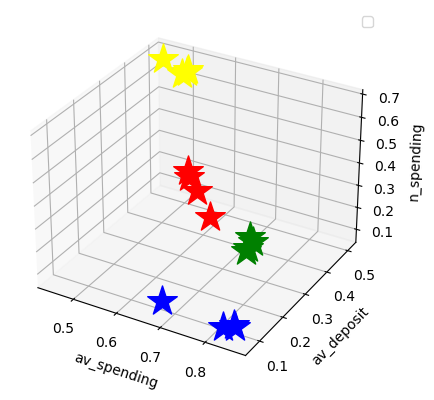

In [335]:
# Create a 3D scatter plot to visualize the data from all 4 dataframes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(centroids2[0,0], centroids2[0,1], centroids2[0,2], marker='*', s=500, c='red')
ax.scatter(centroids2[1,0], centroids2[1,1], centroids2[1,2], marker='*', s=500, c='blue')
ax.scatter(centroids2[2,0], centroids2[2,1], centroids2[2,2], marker='*', s=500, c='green')
ax.scatter(centroids2[3,0], centroids2[3,1], centroids2[3,2], marker='*', s=500, c='yellow')

ax.scatter(centroids[0,0], centroids[0,1], centroids[0,2], marker='*', s=500, c='red')
ax.scatter(centroids[1,0], centroids[1,1], centroids[1,2], marker='*', s=500, c='blue')
ax.scatter(centroids[2,0], centroids[2,1], centroids[2,2], marker='*', s=500, c='green')
ax.scatter(centroids[3,0], centroids[3,1], centroids[3,2], marker='*', s=500, c='yellow')

ax.scatter(centroids3[0,0], centroids3[0,1], centroids3[0,2], marker='*', s=500, c='red')
ax.scatter(centroids3[1,0], centroids3[1,1], centroids3[1,2], marker='*', s=500, c='blue')
ax.scatter(centroids3[2,0], centroids3[2,1], centroids3[2,2], marker='*', s=500, c='green')
ax.scatter(centroids3[3,0], centroids3[3,1], centroids3[3,2], marker='*', s=500, c='yellow')


ax.scatter(centroids4[0,0], centroids4[0,1], centroids4[0,2], marker='*', s=500, c='red')
ax.scatter(centroids4[1,0], centroids4[1,1], centroids4[1,2], marker='*', s=500, c='blue')
ax.scatter(centroids4[2,0], centroids4[2,1], centroids4[2,2], marker='*', s=500, c='green')
ax.scatter(centroids4[3,0], centroids4[3,1], centroids4[3,2], marker='*', s=500, c='yellow')

ax.set_xlabel('av_spending')
ax.set_ylabel('av_deposit')
ax.set_zlabel('n_spending')
plt.legend()
plt.show()

In [282]:
bk_behaviour_f3_cluster.head()

,av_spending,av_deposit,n_spending,n_deposit,total_balance_sept
0,0.636316,0.193015,0.389222,0.419355,0.454142
1,0.780145,0.235886,0.431138,0.564516,0.451597
2,0.660331,0.713396,0.461078,0.387097,0.517496
3,0.412714,0.640877,0.455090,0.709677,0.529528
4,0.648944,0.304032,0.706587,0.677419,0.639200


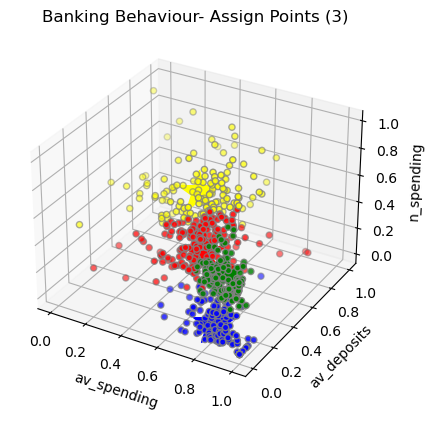

In [321]:
# Extract the first three columns of the DataFrame
data = bk_behaviour_f3_cluster.iloc[:, :3]

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Calculate the distances between the data points and the random points
distances = cdist(bk_behaviour_f3_cluster, centroids2)

# Assign each data point to the closest random point
closest_random_index = np.argmin(distances, axis=1)

# Create a list of colors corresponding to each closest random point
colors = ['red', 'blue', 'green', 'yellow']
colors = [colors[i] for i in closest_random_index]

# Plot the scatterplot with the assigned colors
ax.scatter(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2], c=colors, edgecolors='grey')

# Plot the centroids on the scatterplot
ax.scatter(centroids2[0,0], centroids2[0,1], centroids2[0,2], marker='*', s=1000, c='red')
ax.scatter(centroids2[1,0], centroids2[1,1], centroids2[1,2], marker='*', s=1000, c='blue')
ax.scatter(centroids2[2,0], centroids2[2,1], centroids2[2,2], marker='*', s=1000, c='green')
ax.scatter(centroids2[3,0], centroids2[3,1], centroids2[3,2], marker='*', s=1000, c='yellow')


# Add labels and title to the plot
ax.set_xlabel('av_spending')
ax.set_ylabel('av_deposits')
ax.set_zlabel('n_spending')
plt.title('Banking Behaviour- Assign Points (3)')

# Show the plot
plt.show()

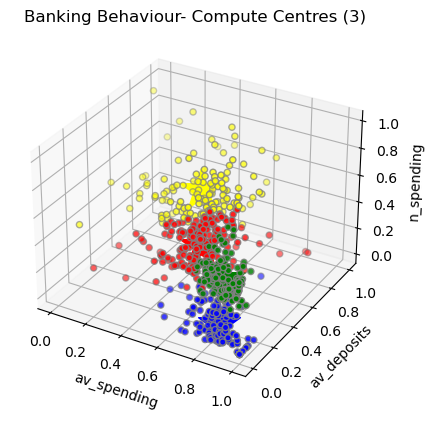

In [322]:
# Extract the first three columns of the DataFrame
data = bk_behaviour_f3_cluster.iloc[:, :3]

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Calculate the distances between the data points and the random points
distances = cdist(bk_behaviour_f3_cluster, centroids2)

# Assign each data point to the closest random point
closest_random_index = np.argmin(distances, axis=1)

# Group the data points based on their assigned closest random point
grouped = bk_behaviour_f3_cluster.groupby(closest_random_index)

# Calculate the centroids for each group
centroids3 = grouped.mean().values

# Plot the centroids on the scatterplot
ax.scatter(centroids3[0,0], centroids3[0,1], centroids3[0,2], marker='*', s=1000, c='red')
ax.scatter(centroids3[1,0], centroids3[1,1], centroids3[1,2], marker='*', s=1000, c='blue')
ax.scatter(centroids3[2,0], centroids3[2,1], centroids3[2,2], marker='*', s=1000, c='green')
ax.scatter(centroids3[3,0], centroids3[3,1], centroids3[3,2], marker='*', s=1000, c='yellow')

# Plot the scatterplot with the assigned colors
ax.scatter(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2], c=colors, edgecolors='grey')

# Add labels and title to the plot
ax.set_xlabel('av_spending')
ax.set_ylabel('av_deposits')
ax.set_zlabel('n_spending')
plt.title('Banking Behaviour- Compute Centres (3)')

# Show the plot
plt.show()

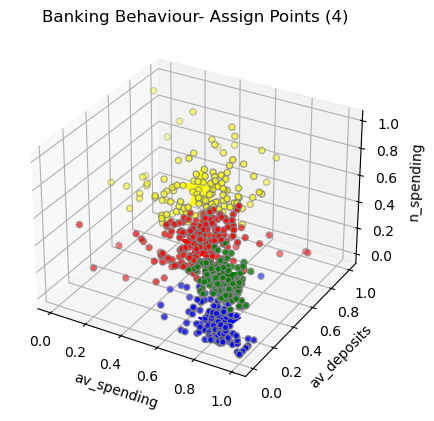

In [323]:
# Extract the first three columns of the DataFrame
data = bk_behaviour_f3_cluster.iloc[:, :3]

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Calculate the distances between the data points and the random points
distances = cdist(bk_behaviour_f3_cluster, centroids3)

# Assign each data point to the closest random point
closest_random_index = np.argmin(distances, axis=1)

# Create a list of colors corresponding to each closest random point
colors = ['red', 'blue', 'green', 'yellow']
colors = [colors[i] for i in closest_random_index]

# Plot the scatterplot with the assigned colors
ax.scatter(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2], c=colors, edgecolors='grey')

# Plot the centroids on the scatterplot
ax.scatter(centroids3[0,0], centroids3[0,1], centroids3[0,2], marker='*', s=1000, c='red')
ax.scatter(centroids3[1,0], centroids3[1,1], centroids3[1,2], marker='*', s=1000, c='blue')
ax.scatter(centroids3[2,0], centroids3[2,1], centroids3[2,2], marker='*', s=1000, c='green')
ax.scatter(centroids3[3,0], centroids3[3,1], centroids3[3,2], marker='*', s=1000, c='yellow')

# Add labels and title to the plot
ax.set_xlabel('av_spending')
ax.set_ylabel('av_deposits')
ax.set_zlabel('n_spending')
plt.title('Banking Behaviour- Assign Points (4)')

# Show the plot
plt.show()

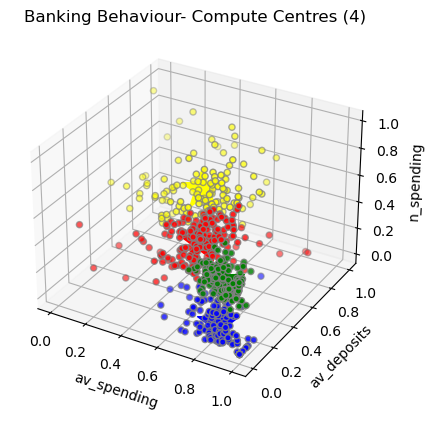

In [324]:
# Extract the first three columns of the DataFrame
data = bk_behaviour_f3_cluster.iloc[:, :3]

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Calculate the distances between the data points and the random points
distances = cdist(bk_behaviour_f3_cluster, centroids3)

# Assign each data point to the closest random point
closest_random_index = np.argmin(distances, axis=1)

# Group the data points based on their assigned closest random point
grouped = bk_behaviour_f3_cluster.groupby(closest_random_index)

# Calculate the centroids for each group
centroids4 = grouped.mean().values

# Plot the centroids on the scatterplot
ax.scatter(centroids4[0,0], centroids4[0,1], centroids4[0,2], marker='*', s=1000, c='red')
ax.scatter(centroids4[1,0], centroids4[1,1], centroids4[1,2], marker='*', s=1000, c='blue')
ax.scatter(centroids4[2,0], centroids4[2,1], centroids4[2,2], marker='*', s=1000, c='green')
ax.scatter(centroids4[3,0], centroids4[3,1], centroids4[3,2], marker='*', s=1000, c='yellow')

# Plot the scatterplot with the assigned colors
ax.scatter(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2], c=colors, edgecolors='grey')

# Add labels and title to the plot
ax.set_xlabel('av_spending')
ax.set_ylabel('av_deposits')
ax.set_zlabel('n_spending')
plt.title('Banking Behaviour- Compute Centres (4)')

# Show the plot
plt.show()

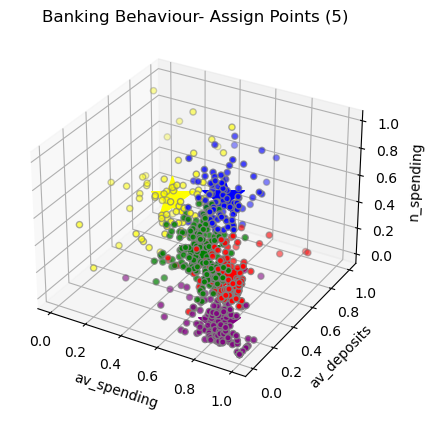

In [277]:
# Extract the first three columns of the DataFrame
data = bk_behaviour_f3_cluster.iloc[:, :3]

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Calculate the distances between the data points and the random points
distances = cdist(bk_behaviour_f3_cluster, centroids4)

# Assign each data point to the closest random point
closest_random_index = np.argmin(distances, axis=1)

# Create a list of colors corresponding to each closest random point
colors = ['red', 'blue', 'green', 'yellow', 'purple']
colors = [colors[i] for i in closest_random_index]

# Plot the scatterplot with the assigned colors
ax.scatter(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2], c=colors, edgecolors='grey')

# Plot the centroids on the scatterplot
ax.scatter(centroids4[0,0], centroids4[0,1], centroids4[0,2], marker='*', s=1000, c='red')
ax.scatter(centroids4[1,0], centroids4[1,1], centroids4[1,2], marker='*', s=1000, c='blue')
ax.scatter(centroids4[2,0], centroids4[2,1], centroids4[2,2], marker='*', s=1000, c='green')
ax.scatter(centroids4[3,0], centroids4[3,1], centroids4[3,2], marker='*', s=1000, c='yellow')
ax.scatter(centroids4[4,0], centroids4[4,1], centroids4[4,2], marker='*', s=1000, c='purple')


# Add labels and title to the plot
ax.set_xlabel('av_spending')
ax.set_ylabel('av_deposits')
ax.set_zlabel('n_spending')
plt.title('Banking Behaviour- Assign Points (5)')

# Show the plot
plt.show()

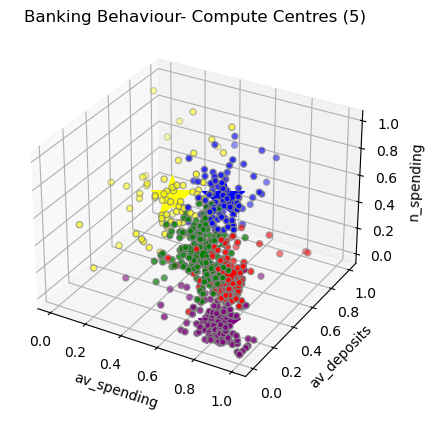

In [278]:
# Extract the first three columns of the DataFrame
data = bk_behaviour_f3_cluster.iloc[:, :3]

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Calculate the distances between the data points and the random points
distances = cdist(bk_behaviour_f3_cluster, centroids4)

# Assign each data point to the closest random point
closest_random_index = np.argmin(distances, axis=1)

# Group the data points based on their assigned closest random point
grouped = bk_behaviour_f3_cluster.groupby(closest_random_index)

# Calculate the centroids for each group
centroids5 = grouped.mean().values

# Plot the centroids on the scatterplot
ax.scatter(centroids5[0,0], centroids5[0,1], centroids5[0,2], marker='*', s=1000, c='red')
ax.scatter(centroids5[1,0], centroids5[1,1], centroids5[1,2], marker='*', s=1000, c='blue')
ax.scatter(centroids5[2,0], centroids5[2,1], centroids5[2,2], marker='*', s=1000, c='green')
ax.scatter(centroids5[3,0], centroids5[3,1], centroids5[3,2], marker='*', s=1000, c='yellow')
ax.scatter(centroids5[4,0], centroids5[4,1], centroids5[4,2], marker='*', s=1000, c='purple')

# Plot the scatterplot with the assigned colors
ax.scatter(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2], c=colors, edgecolors='grey')

# Add labels and title to the plot
ax.set_xlabel('av_spending')
ax.set_ylabel('av_deposits')
ax.set_zlabel('n_spending')
plt.title('Banking Behaviour- Compute Centres (5)')

# Show the plot
plt.show()

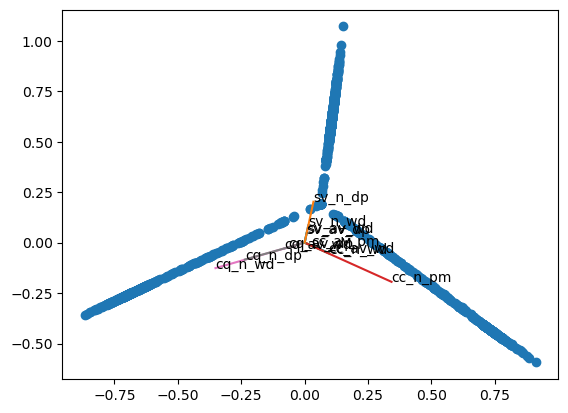

In [142]:
cols_to_use = ['cc_av_wd', 'cc_av_pm', 'cc_n_wd', 'cc_n_pm', 'cq_av_wd', 'cq_av_dp', 'cq_n_wd', 'cq_n_dp', 'sv_av_wd', 'sv_av_dp',	'sv_n_wd', 'sv_n_dp']
data = bk_behaviour_m2[cols_to_use]
pca = PCA(n_components=2)
pca.fit(data)
pca_data = pca.transform(data)

plt.scatter(pca_data[:, 0], pca_data[:, 1])
for i, label in enumerate(cols_to_use):
    x_coord = pca.components_[0, i] * pca.explained_variance_[0] * 2
    y_coord = pca.components_[1, i] * pca.explained_variance_[1] * 2
    plt.plot([0, x_coord], [0, y_coord], label=cols_to_use[i])
    plt.text(x_coord, y_coord, label)
plt.show()

In [109]:
pca.explained_variance_ratio_

array([0.35034843, 0.27220565])

In [143]:
data

,cc_av_wd,cc_av_pm,cc_n_wd,cc_n_pm,cq_av_wd,cq_av_dp,cq_n_wd,cq_n_dp,sv_av_wd,sv_av_dp,sv_n_wd,sv_n_dp
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.187021,0.127231,0.484848,0.59375
1,0.175377,0.040837,0.294118,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.125647,0.010712,0.176471,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.000000,0.000000,0.000000,0.000000,0.432303,0.141949,0.75641,0.617647,0.000000,0.000000,0.000000,0.00000
4,0.233622,0.054137,0.235294,0.916667,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
sv_av_wd,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
sv_av_dp,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
sv_n_wd,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
sv_n_dp,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
